A = NEUTRAL ----- 0

B = NEGATIVE ----- 1

C = POSITIVE ------ 2


In [119]:
import numpy as np
import pandas as pd
import nltk
import matplotlib .pyplot as plt
import re
import warnings
warnings.filterwarnings("ignore")

In [120]:
import pandas as pd
from sklearn.preprocessing import FunctionTransformer
# Modeling
# Finding a baseline model
# The idea is to find the baseline model with default parameters and then tune hyper parameters of the resultant model to improve metric.

# from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from collections import Counter
# Import Plotting Libararies
import matplotlib.pyplot as plt

# Import Data Preprocessing Libraries 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning Models
from sklearn import svm  
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [121]:
# !pip install urduhack

In [122]:
import urduhack
urduhack.download()
from urduhack.normalization import normalize
from urduhack.preprocessing import normalize_whitespace, remove_punctuation, remove_accents, replace_urls, replace_emails, replace_numbers, replace_currency_symbols, remove_english_alphabets

In [62]:
#omporting dataset 
data = pd.read_csv('3sentimentsinc111.csv')
data.head()


,LABELS,NEWS,SNO
0,NEUTRAL,میں نے ایٹم بم بنایا ھے,1
1,NEUTRAL,ابھی تک اسکی لہریں کبھی کبھی آ جاتی ہیں یار :أْ,2
2,NEUTRAL,"قاتل بھی تم مقتول بھی تم,ظالم بھی ہم اور مظلوم...",3
3,POSITIVE,ﻧﻮﺭ ﺑﻐﺪﺍﺩ ﮐﯽ ﮔﻠﯿﻮﮞ ﮐﺎ ﮨﮯ ﮨﺮ ﺍﯾﮏ ﮐﺮﻥ ﺍﺱ ﮐﯽ ﻣﺪﯾﻨ...,4
4,POSITIVE,یہ لفظوں كى شرارت ھے سنبهل کر کچھ بهى لِكهنا ت...,5


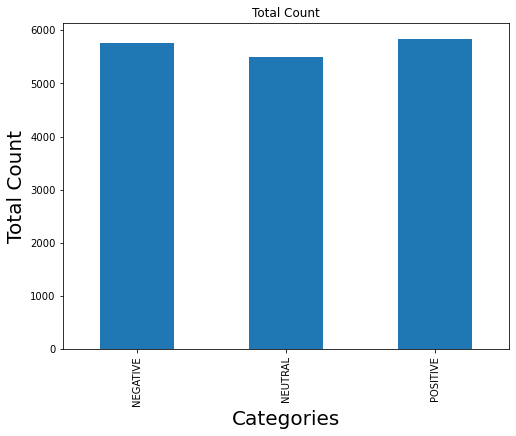

In [63]:
category_id_df = data[['NEWS', 'LABELS']].drop_duplicates().sort_values('LABELS')
category_id_df.groupby('LABELS').count()
category_id_df.head()

import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(8,6))
category_id_df.groupby('LABELS').NEWS.count().plot.bar(ylim=0)
#plt.show()

#data_count = df1.groupby('Type').count()
#plt.bar(data_count.index.values, data_count['Descrption'])
plt.title("Total Count")
plt.xlabel('Categories', fontsize=20)
plt.ylabel('Total Count', fontsize=20)
plt.show()

In [64]:
# Make Copy of dataset so we dont have to load again and again
# Make copy of a dataset
df =  data.copy()
df

,LABELS,NEWS,SNO
0,NEUTRAL,میں نے ایٹم بم بنایا ھے,1
1,NEUTRAL,ابھی تک اسکی لہریں کبھی کبھی آ جاتی ہیں یار :أْ,2
2,NEUTRAL,"قاتل بھی تم مقتول بھی تم,ظالم بھی ہم اور مظلوم...",3
3,POSITIVE,ﻧﻮﺭ ﺑﻐﺪﺍﺩ ﮐﯽ ﮔﻠﯿﻮﮞ ﮐﺎ ﮨﮯ ﮨﺮ ﺍﯾﮏ ﮐﺮﻥ ﺍﺱ ﮐﯽ ﻣﺪﯾﻨ...,4
4,POSITIVE,یہ لفظوں كى شرارت ھے سنبهل کر کچھ بهى لِكهنا ت...,5
...,...,...,...
17995,POSITIVE,پاکستانی ڈاکٹروں کو جدید تربیت کیلیے بیرون ملک...,17996
17996,NEUTRAL,ایم کیو ایم منی لانڈرنگ کیس، وفاقی وزیر فروغ ...,17997
17997,NEUTRAL,”چیف جسٹس نے صلاحیت اور اہلیت کے ریمارکس حکوم...,17998
17998,NEUTRAL,پی ٹی آئی کے اہم ترین وزیر نے ’اقامہ‘ رکھنے ک...,17999


In [65]:
# prerocessing

In [66]:
# checking anything is null
df.isnull().sum()

LABELS    0
NEWS      0
SNO       0
dtype: int64

In [67]:
# putthing space in the null value
df['NEWS'] = df['NEWS'].fillna(' ')
df

,LABELS,NEWS,SNO
0,NEUTRAL,میں نے ایٹم بم بنایا ھے,1
1,NEUTRAL,ابھی تک اسکی لہریں کبھی کبھی آ جاتی ہیں یار :أْ,2
2,NEUTRAL,"قاتل بھی تم مقتول بھی تم,ظالم بھی ہم اور مظلوم...",3
3,POSITIVE,ﻧﻮﺭ ﺑﻐﺪﺍﺩ ﮐﯽ ﮔﻠﯿﻮﮞ ﮐﺎ ﮨﮯ ﮨﺮ ﺍﯾﮏ ﮐﺮﻥ ﺍﺱ ﮐﯽ ﻣﺪﯾﻨ...,4
4,POSITIVE,یہ لفظوں كى شرارت ھے سنبهل کر کچھ بهى لِكهنا ت...,5
...,...,...,...
17995,POSITIVE,پاکستانی ڈاکٹروں کو جدید تربیت کیلیے بیرون ملک...,17996
17996,NEUTRAL,ایم کیو ایم منی لانڈرنگ کیس، وفاقی وزیر فروغ ...,17997
17997,NEUTRAL,”چیف جسٹس نے صلاحیت اور اہلیت کے ریمارکس حکوم...,17998
17998,NEUTRAL,پی ٹی آئی کے اہم ترین وزیر نے ’اقامہ‘ رکھنے ک...,17999


In [68]:
# checking anything is null
df.isnull().sum()

LABELS    0
NEWS      0
SNO       0
dtype: int64

In [69]:
# Associate Category names with numerical index and save it in new column category_id
encoded_sentiments=df['encoded_sentiments'] = df['LABELS'].factorize()[0]
encoded_sentiments

# category_id = review_df.CLASS.factorize()
# category_id
# View first 10 entries of category_id, as a sanity check
df['encoded_sentiments'][0:10]
encoded_sentiments = df.LABELS.factorize()
print(encoded_sentiments)
encoded_sentiments = np.array(encoded_sentiments)

# print()
# # np.array(sentiment_label)
print(type(encoded_sentiments))

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64), Index(['NEUTRAL', 'POSITIVE', 'NEGATIVE'], dtype='object'))
<class 'numpy.ndarray'>


In [70]:
category_id_df = df[['LABELS', 'encoded_sentiments']].drop_duplicates().sort_values('encoded_sentiments')
category_id_df

,LABELS,encoded_sentiments
0,NEUTRAL,0
3,POSITIVE,1
1389,NEGATIVE,2


In [71]:
df.sample(5, random_state=0)

,LABELS,NEWS,SNO,encoded_sentiments
1469,NEUTRAL,سندھ کی جامعات میں آخر یہ کیا ہو رہا ہے؟,1470,0
9642,NEUTRAL,کراچی میں بین الاقوامی ڈرگ ڈیلرز کے خلاف کارروائی,9643,0
2107,NEGATIVE,پی ٹی آئی ارسلان تاج کی گرفتاری کیخلاف عدالت ...,2108,2
17031,NEGATIVE,ملک میں پولیو کا ایک اور کیس رپورٹ، 16 ماہ کا ...,17032,2
9349,NEGATIVE,ایک دن میں 22 لاکھ سے زائد افراد کو ویکسین لگا...,9350,2


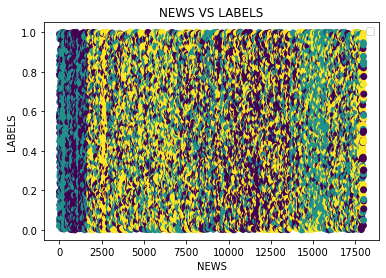

In [72]:


# Create a scatter plot
fig, ax = plt.subplots()
ax.scatter(data['SNO'], np.random.rand(len(data.SNO)), c=df['encoded_sentiments'],cmap='viridis')

# Add labels and title
ax.set_xlabel('NEWS')
ax.set_ylabel('LABELS')
ax.set_title('NEWS VS LABELS')

# Add legend with original labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

# Display the plot
plt.show()

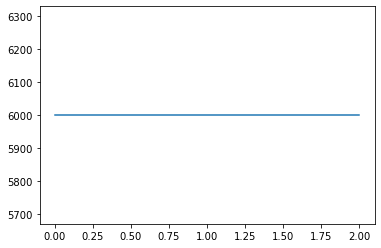

In [73]:
plt.plot(df['encoded_sentiments'].value_counts())

In [74]:
df['encoded_sentiments'].value_counts()
# 0-----NEUTRAL
# 1-----NEGATIVE
# 2-----POSITIVE

0    6000
1    6000
2    6000
Name: encoded_sentiments, dtype: int64

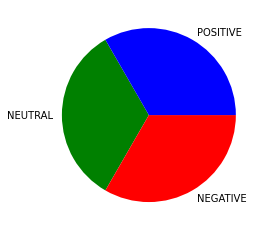

In [75]:
#### PIE CHART
A= [6000,6000,6000]
LABEL = ["NEUTRAL","NEGATIVE","POSITIVE"]
COLS = ["GREEN","RED","BLUE"]
plt.pie(A,labels = LABEL,colors = COLS,startangle = 120,explode = (0,0,0))
plt.show()

In [76]:
# Apply urduhack preprocessing
# Now we will apply text cleaning modules from Urdu Hack Library

df['NEWS'] = df['NEWS'].apply(normalize) # To normalize some text, all you need to do pass unicode text. It will return a str with normalized characters both single and combined, proper spaces after digits and punctuations and diacritics(Zabar - Paish) removed.
# df['review'] = df['review'].apply(remove_punctuation) # Remove punctuation from text by removing all instances of marks. marks=',;:'
df['NEWS'] = df['NEWS'].apply(remove_accents) # Remove accents from any accented unicode characters in text str, either by transforming them into ascii equivalents or removing them entirely.
df['NEWS'] = df['NEWS'].apply(replace_urls) # Replace all URLs in text str with replace_with str.
df['NEWS'] = df['NEWS'].apply(replace_emails) # Replace all emails in text str with replace_with str.
# df['review'] = df['review'].apply(replace_numbers) # Replace all numbers in text str with replace_with str.
df['NEWS'] = df['NEWS'].apply(replace_currency_symbols) # Replace all currency symbols in text str with string specified by replace_with str.
# df['review'] = df['review'].apply(remove_english_alphabets) # Removes English words and digits from a text
df['NEWS'] = df['NEWS'].apply(normalize_whitespace) ## Given text str, replace one or more spacings with a single space, and one or more linebreaks with a single newline. Also strip leading/trailing whitespace.


In [77]:
df

,LABELS,NEWS,SNO,encoded_sentiments
0,NEUTRAL,میں نے ایٹم بم بنایا ھے,1,0
1,NEUTRAL,ابھی تک اسکی لہریں کبھی کبھی آ جاتی ہیں یار :أ,2,0
2,NEUTRAL,"قاتل بھی تم مقتول بھی تم,ظالم بھی ہم اور مظلوم...",3,0
3,POSITIVE,نور بغداد کی گلیوں کا ہے ہر ایک کرن اس کی مدین...,4,1
4,POSITIVE,یہ لفظوں کی شرارت ھے سنبہل کر کچھ بہی لکہنا تم...,5,1
...,...,...,...,...
17995,POSITIVE,پاکستانی ڈاکٹروں کو جدید تربیت کیلیے بیرون ملک...,17996,1
17996,NEUTRAL,ایم کیو ایم منی لانڈرنگ کیس، وفاقی وزیر فروغ ن...,17997,0
17997,NEUTRAL,”چیف جسٹس نے صلاحیت اور اہلیت کے ریمارکس حکومت...,17998,0
17998,NEUTRAL,پی ٹی آئی کے اہم ترین وزیر نے ’اقامہ‘ رکھنے کا...,17999,0


In [78]:
# Remove stop words from text
from typing import FrozenSet
# Urdu Language Stop words list
STOP_WORDS: FrozenSet[str] = frozenset("""
 آ آئی آئیں آئے آتا آتی آتے آس آمدید آنا آنسہ آنی آنے آپ آگے آہ آہا آیا اب ابھی ابے
 ارے اس اسکا اسکی اسکے اسی اسے اف افوہ البتہ الف ان اندر انکا انکی انکے انہوں انہی انہیں اوئے اور اوپر
 اوہو اپ اپنا اپنوں اپنی اپنے اپنےآپ اکثر اگر اگرچہ اہاہا ایسا ایسی ایسے ایک بائیں بار بارے بالکل باوجود باہر
 بج بجے بخیر بشرطیکہ بعد بعض بغیر بلکہ بن بنا بناؤ بند بڑی بھر بھریں بھی بہت بہتر تاکہ تاہم تب تجھ
 تجھی تجھے ترا تری تلک تم تمام تمہارا تمہاروں تمہاری تمہارے تمہیں تو تک تھا تھی تھیں تھے تیرا تیری تیرے
 جا جاؤ جائیں جائے جاتا جاتی جاتے جانی جانے جب جبکہ جدھر جس جسے جن جناب جنہوں جنہیں جو جہاں جی جیسا
 جیسوں جیسی جیسے حالانکہ حالاں حصہ حضرت خاطر خالی خواہ خوب خود دائیں درمیان دریں دو دوران دوسرا دوسروں دوسری دوں
 دکھائیں دی دیئے دیا دیتا دیتی دیتے دیر دینا دینی دینے دیکھو دیں دیے دے ذریعے رکھا رکھتا رکھتی رکھتے رکھنا رکھنی
 رکھنے رکھو رکھی رکھے رہ رہا رہتا رہتی رہتے رہنا رہنی رہنے رہو رہی رہیں رہے ساتھ سامنے ساڑھے سب سبھی
 سراسر سمیت سوا سوائے سکا سکتا سکتے سہ سہی سی سے شاید شکریہ صاحب صاحبہ صرف ضرور طرح طرف طور علاوہ عین
 فقط فلاں فی قبل قطا لئے لائی لائے لاتا لاتی لاتے لانا لانی لانے لایا لو لوجی لوگوں لگ لگا لگتا
 لگتی لگی لگیں لگے لہذا لی لیا لیتا لیتی لیتے لیکن لیں لیے لے ماسوا مت مجھ مجھی مجھے محترم محترمہ محض
 مرا مرحبا مری مرے مزید مس مسز مسٹر مطابق مل مکرمی مگر مگھر مہربانی میرا میروں میری میرے میں نا نزدیک
 نما نہ نہیں نیز نیچے نے و وار واسطے واقعی والا والوں والی والے واہ وجہ ورنہ وغیرہ ولے وگرنہ وہ وہاں
 وہی وہیں ویسا ویسے ویں پاس پایا پر پس پلیز پون پونی پونے پھر پہ پہلا پہلی پہلے پیر پیچھے چاہئے
 چاہتے چاہیئے چاہے چلا چلو چلیں چلے چناچہ چند چونکہ چکی چکیں چکے ڈالنا ڈالنی ڈالنے ڈالے کئے کا کاش کب کبھی
 کدھر کر کرتا کرتی کرتے کرم کرنا کرنے کرو کریں کرے کس کسی کسے کم کن کنہیں کو کوئی کون کونسا
 کونسے کچھ کہ کہا کہاں کہہ کہی کہیں کہے کی کیا کیسا کیسے کیونکر کیونکہ کیوں کیے کے گئی گئے گا گنا
 گو گویا گی گیا ہائیں ہائے ہاں ہر ہرچند ہرگز ہم ہمارا ہماری ہمارے ہمی ہمیں ہو ہوئی ہوئیں ہوئے ہوا
 ہوبہو ہوتا ہوتی ہوتیں ہوتے ہونا ہونگے ہونی ہونے ہوں ہی ہیلو ہیں ہے یا یات یعنی یک یہ یہاں یہی یہیں
""".split())
def remove_stopwords(text: str):
    return " ".join(word for word in text.split() if word not in STOP_WORDS)

In [79]:
len(STOP_WORDS)

430

In [80]:
df[['NEWS']].head(10)

,NEWS
0,میں نے ایٹم بم بنایا ھے
1,ابھی تک اسکی لہریں کبھی کبھی آ جاتی ہیں یار :أ
2,"قاتل بھی تم مقتول بھی تم,ظالم بھی ہم اور مظلوم..."
3,نور بغداد کی گلیوں کا ہے ہر ایک کرن اس کی مدین...
4,یہ لفظوں کی شرارت ھے سنبہل کر کچھ بہی لکہنا تم...
5,سمارٹ فون کے عادیوں کے لیے ڈجٹل ڈیٹاکس کیپ متع...
6,وزیر اعظم کی زیر صدارت پارلیمانی رہنماؤں کا اجلاس
7,سوچا تھا شہباز شریف وہاں سے کام آگے لے کر جائی...
8,تیز بارش ہو ، گھنا پیڑ ہو ، اک لڑکی ہوایسے منظ...
9,لاہور: دھرنوں کے باعث سیاسی عدم استحکام تھا۔ ا...


In [81]:
from urduhack.models.lemmatizer import lemmatizer
def lemitizeStr(str):
    lemme_str = ""
    temp = lemmatizer.lemma_lookup(str)
    for t in temp:
        lemme_str += t[0] + " "
    
    return lemme_str

In [82]:
df['NEWS'] =  df['NEWS'].apply(remove_stopwords)
df

,LABELS,NEWS,SNO,encoded_sentiments
0,NEUTRAL,ایٹم بم بنایا ھے,1,0
1,NEUTRAL,لہریں یار :أ,2,0
2,NEUTRAL,"قاتل مقتول تم,ظالم مظلوم تم؟",3,0
3,POSITIVE,نور بغداد گلیوں کرن مدینہ چلی,4,1
4,POSITIVE,لفظوں شرارت ھے سنبہل بہی لکہنا محبت لفظ ھے بہی...,5,1
...,...,...,...,...
17995,POSITIVE,پاکستانی ڈاکٹروں جدید تربیت کیلیے بیرون ملک بھ...,17996,1
17996,NEUTRAL,ایم کیو ایم منی لانڈرنگ کیس، وفاقی وزیر فروغ ن...,17997,0
17997,NEUTRAL,”چیف جسٹس صلاحیت اہلیت ریمارکس حکومت کیلئے دئی...,17998,0
17998,NEUTRAL,پی ٹی اہم ترین وزیر ’اقامہ‘ اعتراف لیا،,17999,0


In [83]:
df['lemmatized_text'] = df['NEWS'].apply(lemitizeStr)
df['NEWS'][7], df['lemmatized_text'][7]

('سوچا شہباز شریف کام گے چھوڑا چودھری پرویز الہی چودھری پنجاب تباہ شہباز ترقیاتی کام پنجاب سنوار',
 'سوچا شہباز شریف کام گے چھوڑا چودھری پرویز الہی چودھری پنجاب تباہ شہباز ترقیاتی کام پنجاب سنوار ')

In [84]:
df[['NEWS', 'lemmatized_text']].head(10)

,NEWS,lemmatized_text
0,ایٹم بم بنایا ھے,ایٹم بم بنایا ھے
1,لہریں یار :أ,لہریں یار :أ
2,"قاتل مقتول تم,ظالم مظلوم تم؟","قاتل مقتول تم,ظالم مظلوم تم؟"
3,نور بغداد گلیوں کرن مدینہ چلی,نور بغداد گلیوں کرن مدینہ چلی
4,لفظوں شرارت ھے سنبہل بہی لکہنا محبت لفظ ھے بہی...,لفظوں شرارت ھے سنبہل بہی لکہنا محبت لفظ ھے بہی...
5,سمارٹ فون عادیوں ڈجٹل ڈیٹاکس کیپ متعارف۔,سمارٹ فون عادیوں ڈجٹل ڈیٹاکس کیپ متعارف۔
6,وزیر اعظم زیر صدارت پارلیمانی رہنماؤں اجلاس,وزیر اعظم زیر صدارت پارلیمانی رہنماؤں اجلاس
7,سوچا شہباز شریف کام گے چھوڑا چودھری پرویز الہی...,سوچا شہباز شریف کام گے چھوڑا چودھری پرویز الہی...
8,تیز بارش ، گھنا پیڑ ، اک لڑکی ہوایسے منظر شہرو...,تیز بارش ، گھنا پیڑ ، اک لڑکی ہوایسے منظر شہرو...
9,لاہور: دھرنوں باعث سیاسی عدم استحکام تھا۔ معام...,لاہور: دھرنوں باعث سیاسی عدم استحکام تھا۔ معام...


In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(df['lemmatized_text'], df['encoded_sentiments'], test_size = 0.30, random_state = 2, shuffle = True)

In [86]:
print('Shape of X_train', X_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of Y_train', Y_train.shape)
print('Shape of Y_test', Y_test.shape)


Shape of X_train (12600,)
Shape of X_test (5400,)
Shape of Y_train (12600,)
Shape of Y_test (5400,)


In [87]:
# Count unique words
def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count

In [88]:
counter = counter_word(df.lemmatized_text)
num_unique_words = len(counter)
num_unique_words


17429

In [89]:
counter

Counter({'ایٹم': 1,
         'بم': 18,
         'بنایا': 25,
         'ھے': 34,
         'لہریں': 1,
         'یار': 5,
         ':أ': 1,
         'قاتل': 24,
         'مقتول': 3,
         'تم,ظالم': 1,
         'مظلوم': 1,
         'تم؟': 1,
         'نور': 21,
         'بغداد': 4,
         'گلیوں': 2,
         'کرن': 6,
         'مدینہ': 2,
         'چلی': 3,
         'لفظوں': 2,
         'شرارت': 4,
         'سنبہل': 1,
         'بہی': 3,
         'لکہنا': 1,
         'محبت': 39,
         'لفظ': 7,
         '۔۔۔۔!': 1,
         'سمارٹ': 4,
         'فون': 217,
         'عادیوں': 1,
         'ڈجٹل': 1,
         'ڈیٹاکس': 1,
         'کیپ': 1,
         'متعارف۔': 1,
         'وزیر': 401,
         'اعظم': 289,
         'زیر': 44,
         'صدارت': 15,
         'پارلیمانی': 6,
         'رہنماؤں': 20,
         'اجلاس': 66,
         'سوچا': 5,
         'شہباز': 69,
         'شریف': 119,
         'کام': 144,
         'گے': 197,
         'چھوڑا': 2,
         'چودھری': 6,
         'پرویز': 2

In [90]:
# vectorize a text corpus by turning each text into a sequence of integers
tokenizer = Tokenizer(num_words=num_unique_words)
tokenizer.fit_on_texts(X_train) # fit only to training

In [91]:
# each word has unique index
word_index = tokenizer.word_index
word_index

{'ویڈیو': 1,
 'پاکستان': 2,
 'وائرل': 3,
 'کرونا': 4,
 'خان': 5,
 'ہے؟': 6,
 'وائرس': 7,
 'کراچی': 8,
 'عمران': 9,
 'اہم': 10,
 'کورونا': 11,
 'پی': 12,
 'وزیر': 13,
 'ملک': 14,
 'خاتون': 15,
 'کیسز': 16,
 'کیلئے': 17,
 'سال': 18,
 'فیصلہ': 19,
 'حیران': 20,
 'ویکسین': 21,
 'دل': 22,
 'ہیں؟': 23,
 'حکومت': 24,
 'ٹی': 25,
 'کردیا': 26,
 'پولیس': 27,
 'افراد': 28,
 'دنیا': 29,
 'نئی': 30,
 'انکشاف': 31,
 'جاری': 32,
 'تصویر': 33,
 'اعلان': 34,
 'بڑا': 35,
 'دیکھیں': 36,
 'صارفین': 37,
 'بچے': 38,
 'اعظم': 39,
 '،': 40,
 'روپے': 41,
 'پنجاب': 42,
 'ایپ': 43,
 'سندھ': 44,
 'متعلق': 45,
 'رپورٹ': 46,
 'صحت': 47,
 'گھر': 48,
 '2': 49,
 'واٹس': 50,
 'بچوں': 51,
 'شخص': 52,
 'گے': 53,
 'لاہور': 54,
 'نئے': 55,
 'شادی': 56,
 'خلاف': 57,
 'جان': 58,
 'پاکستانی': 59,
 'نیا': 60,
 'گرفتار': 61,
 'تیار': 62,
 'خوفناک': 63,
 'آج': 64,
 'استعمال': 65,
 'فون': 66,
 'میں\u200c': 67,
 'ایم': 68,
 'پہنچ': 69,
 'زائد': 70,
 'بھارت': 71,
 'عالمی': 72,
 'خطرناک': 73,
 'ہے': 74,
 'شہری': 75,
 'دن': 76,
 'آبا

In [92]:
len(word_index)

13852

###### TFIDF

In [93]:
# TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a 
# collection of documents. This is done by multiplying two metrics: how many times a word
# appears in a document, and the inverse document frequency of the word across a set of documents.

max_feature_num = 5000
vectorizer = TfidfVectorizer(max_features=max_feature_num)
train_vecs = vectorizer.fit_transform(X_train)
test_vecs = TfidfVectorizer(max_features=max_feature_num, vocabulary=vectorizer.vocabulary_).fit_transform(X_test)
print(train_vecs)

  (0, 4896)	0.3442878744992743
  (0, 4670)	0.41076111778022034
  (0, 4069)	0.34295292896640667
  (0, 1683)	0.4094720499728301
  (0, 2935)	0.40225046453860064
  (0, 732)	0.5154140628423004
  (1, 4962)	0.25789315438152693
  (1, 3270)	0.4349645199521945
  (1, 4671)	0.4157699116568015
  (1, 3730)	0.43201718732098804
  (1, 4339)	0.6203172718263298
  (2, 467)	0.38500291125408653
  (2, 4822)	0.3286416632919801
  (2, 2703)	0.4904368665087178
  (2, 2237)	0.44771467497171363
  (2, 2559)	0.4175966189014187
  (2, 3893)	0.3583346608140846
  (3, 2356)	0.37370303654777215
  (3, 696)	0.6011300313843727
  (3, 390)	0.3333178055621973
  (3, 1963)	0.3646364980580167
  (3, 4452)	0.38051771121757927
  (3, 1694)	0.33186512632652376
  (4, 3162)	0.44248373386146034
  (4, 3631)	0.3870835453992937
  :	:
  (12597, 3661)	0.34879186763279196
  (12597, 4511)	0.32854970015698887
  (12597, 452)	0.3028381173076058
  (12597, 4711)	0.30941671492622685
  (12597, 4179)	0.3140924138581333
  (12597, 2671)	0.3208111021993413


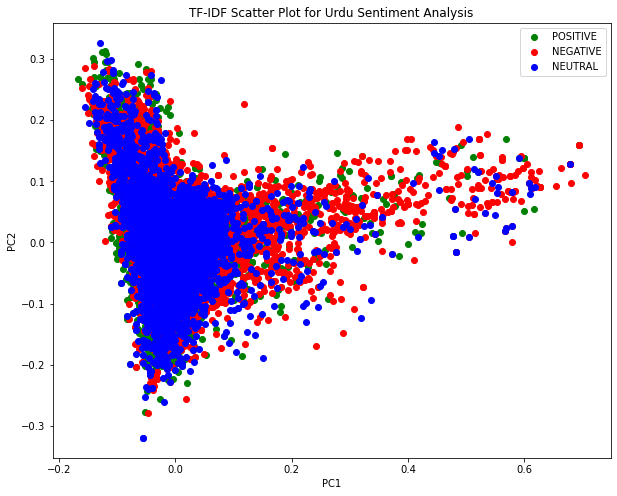

In [116]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# load the dataset
data = pd.read_csv('3sentimentsinc111.csv', encoding='utf-8')

# create the TF-IDF vectorizer
tfidf = TfidfVectorizer()

# fit and transform the data to TF-IDF vectors
tfidf_vectors = tfidf.fit_transform(data['NEWS'].values.astype('U'))

# apply PCA to reduce the dimensionality of the TF-IDF vectors
pca = PCA(n_components=2)
tfidf_pca = pca.fit_transform(tfidf_vectors.toarray())

# create a new DataFrame with the PCA-transformed TF-IDF values and sentiment labels
data_tfidf = pd.DataFrame(tfidf_pca, columns=['PC1', 'PC2'])
data_tfidf['LABELS'] = data['LABELS']

# separate the data based on sentiment labels
data_positive = data_tfidf[data_tfidf['LABELS'] == 'POSITIVE']
data_negative = data_tfidf[data_tfidf['LABELS'] == 'NEGATIVE']
data_neutral = data_tfidf[data_tfidf['LABELS'] == 'NEUTRAL']

# plot the scatter plot
plt.figure(figsize=(10,8))
plt.scatter(data_positive['PC1'], data_positive['PC2'], c='green', label='POSITIVE')
plt.scatter(data_negative['PC1'], data_negative['PC2'], c='red', label='NEGATIVE')
plt.scatter(data_neutral['PC1'], data_neutral['PC2'], c='blue', label='NEUTRAL')
plt.title('TF-IDF Scatter Plot for Urdu Sentiment Analysis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

##### WORD2VEC

In [94]:
# Word Embeddings
# Each word is coverted into a set of vectors in this model. These vectors are the weights
# formed from the single hidden layer neural network that is trained on the input one hot 
# encoded tokens. This maintains the semantics of the word based on its context.
from gensim.models import Word2Vec
train_features_w2v = X_train.reset_index()['lemmatized_text']
test_features_w2v = X_test.reset_index()['lemmatized_text']
tokenized_train_features_w2v = train_features_w2v.apply(lambda x:x.split())
tokenized_test_features_w2v = test_features_w2v.apply(lambda x:x.split())

In [95]:
word2vec_model = Word2Vec(
    tokenized_train_features_w2v,
    vector_size=200,  # desired number of features/ independent variables for each word
    window=5,  # context window size
    min_count=2,
    sg=1,  # skip gram model
    hs=0,
    negative=10,  # negative sampling
    workers=2,
    seed=34
)

word2vec_model.train(tokenized_train_features_w2v, total_examples=len(train_features_w2v), epochs=10)

(857832, 960090)

In [96]:
similar_words = word2vec_model.wv.most_similar('قاتل')
print(similar_words)

[('رہا،', 0.8832831382751465), ('کپڑے', 0.881899356842041), ('نرس', 0.8803560733795166), ('ڈور', 0.8740247488021851), ('کیڑے', 0.8708846569061279), ('دھونے', 0.8701776266098022), ('پاؤں', 0.8624153733253479), ('معمہ', 0.8557493686676025), ('سکھاتی', 0.8477306962013245), ('فروش', 0.8477082252502441)]


In [97]:
similar_words = word2vec_model.wv.most_similar('عجیب')
print(similar_words)

[('غریب', 0.8570002913475037), ('الخلقت', 0.8398052453994751), ('سمندری', 0.829358696937561), ('بچھڑے', 0.8024465441703796), ('وغریب', 0.7974510192871094), ('مخلوق', 0.7936004996299744), ('پیدائش،', 0.788856565952301), ('حرکت', 0.7702900171279907), ('کالے', 0.739805281162262), ('’مینڈک‘', 0.7377641201019287)]


In [98]:
word2vec_model.wv.similarity(w1 = 'دنیا',w2 = 'پانی')

0.16935775

In [99]:
vector_size = word2vec_model.vector_size
print(vector_size)

200


In [100]:
# Now, In order to prepare vector of the NEWS , we take the average of the vectors of the words that NEWS.


def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += word2vec_model.wv.word_vec(word).reshape((1, size))
            count += 1
        except KeyError:
            # handling the case where the token is not in the vocabulary
            continue
    if count != 0:
        vec /= count
    return vec


In [101]:
# Now, preparing Word2vec feature set for train features:

train_array_w2v = np.zeros((len(tokenized_train_features_w2v), 200))

for i in range(len(tokenized_train_features_w2v)):
    train_array_w2v[i, :] = word_vector(tokenized_train_features_w2v[i], 200)

train_features_w2v = pd.DataFrame(train_array_w2v)

In [102]:
# Now, preparing Word2vec feature set for test features:

test_array_w2v = np.zeros((len(tokenized_test_features_w2v), 200))

for i in range(len(tokenized_test_features_w2v)):
    test_array_w2v[i,:] = word_vector(tokenized_test_features_w2v[i], 200)
    
test_features_w2v = pd.DataFrame(test_array_w2v) 
 

###### FASTTEXT

In [103]:
# !pip install fasttext

In [104]:
# Save preprocessed training data to a text file
import fasttext
train_data_path = 'train_data.txt'
X_train.to_csv(train_data_path, index=False, header=None, sep=' ')

# Train the FastText model
model = fasttext.train_supervised(input=train_data_path, epoch=10)

# Save the trained model
model_path = 'fasttext_model.bin'
model.save_model(model_path)

In [105]:
fasttext_model = fasttext.load_model(model_path)

In [106]:
# Convert text data to FastText input format:
def preprocess_data(text):
    return text.replace('\n', ' ')

X_train_preprocessed = [preprocess_data(text) for text in X_train]
X_test_preprocessed = [preprocess_data(text) for text in X_test]


In [107]:
# Convert text data to FastText vectors:
X_train_vectors = [fasttext_model.get_sentence_vector(text) for text in X_train_preprocessed]
X_test_vectors = [fasttext_model.get_sentence_vector(text) for text in X_test_preprocessed]

##### MACHINE LEARNING ALGORITHMS USING TFIDF ,WORD2VEC,FASTTEXT

###### LOGISTIC ,SVM,RANDOMFOREST USING FASTTEXT

In [113]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_vectors, Y_train)
lr_predictions = lr.predict(X_test_vectors)
lr_accuracy = accuracy_score(Y_test, lr_predictions)
lr_accuracyt = accuracy_score(Y_train, lr.predict(X_train_vectors))

print('Logistic Regression test accuracy:', lr_accuracy)
print('Logistic Regression train accuracy:', lr_accuracyt)

# SVM
svm = SVC()
svm.fit(X_train_vectors, Y_train)
svm_predictions = svm.predict(X_test_vectors)
svm_accuracy = accuracy_score(Y_test, svm_predictions)
svm_accuracyt = accuracy_score(Y_train, svm.predict(X_train_vectors))
print('SVM test accuracy:', svm_accuracy)
print('SVM train accuracy:', svm_accuracyt)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_vectors, Y_train)
rf_predictions = rf.predict(X_test_vectors)
rf_accuracy = accuracy_score(Y_test, rf_predictions)
rf_accuracyt = accuracy_score(Y_train, rf.predict(X_train_vectors))
print('Random Forest test accuracy:', rf_accuracy)
print('Random Forest train accuracy:', rf_accuracyt)

Logistic Regression test accuracy: 0.39481481481481484
Logistic Regression train accuracy: 0.4147619047619048
SVM test accuracy: 0.5062962962962962
SVM train accuracy: 0.7607142857142857
Random Forest test accuracy: 0.4462962962962963
Random Forest train accuracy: 0.9617460317460318


###### LOGISTIC,SVM,RANDOMFOREST USING WORD2VEC,TFIDF

In [114]:
# pipe_logreg_cv = Pipeline ([('cv' , CountVectorizer()),('logreg', LogisticRegression (class_weight = 'balanced', random_state=42))])
pipe_logreg_tfidf = Pipeline ([('tfidf' , TfidfVectorizer()),('logreg', LogisticRegression(class_weight = 'balanced',random_state=42))])
pipe_logreg_w2v = Pipeline ([('logreg', LogisticRegression (class_weight = 'balanced',random_state=42))])

# pipe_rf_cv = Pipeline ([('cv' , CountVectorizer()),('rf', RandomForestClassifier (random_state=42))])
pipe_rf_tfidf = Pipeline ([('tfidf' , TfidfVectorizer()),('rf', RandomForestClassifier (random_state=42))])
pipe_rf_w2v = Pipeline ([('rf', RandomForestClassifier (random_state=42))])

pipe_SVM_tfidf = Pipeline ([('tfidf' , TfidfVectorizer()),('svm', SVC (random_state=42))])
pipe_SVM_w2v = Pipeline ([('svm', SVC (random_state=42))])


pipeline_list = [pipe_logreg_tfidf,pipe_logreg_w2v,pipe_rf_tfidf,pipe_rf_w2v,pipe_SVM_tfidf,pipe_SVM_w2v]

pipeline_dict = { 0: 'Logistic Regression with Tfidf', 
             1: 'Logistic Regression with w2v',2: 'Random Forest with Tfidf' ,3: 'Random Forest with w2v',
                 4: 'SVM with Tfidf',5: 'SVM with w2v'}

In [115]:
for idx, gs in enumerate(pipeline_list):
    print('\nEstimator: %s' % pipeline_dict[idx])
    train_features1 = train_features_w2v if pipeline_dict[idx] == 'Logistic Regression with w2v' or  pipeline_dict[idx] == 'Random Forest with w2v' or  pipeline_dict[idx] == 'SVM with w2v' else X_train
    test_features1 = test_features_w2v if pipeline_dict[idx] == 'Logistic Regression with w2v'  or  pipeline_dict[idx] == 'Random Forest with w2v' or  pipeline_dict[idx] == 'SVM with w2v' else X_test
    # Fit grid search
    gs.fit(train_features1, Y_train)
    # Predict on test data with best params
    y_pred = gs.predict(test_features1)
    # Test data accuracy of model with best params
    print('Test set accuracy score: %.3f' % accuracy_score(Y_test, y_pred))
    print('Train set accuracy score: %.3f' % accuracy_score(Y_train, gs.predict(train_features1)))


Estimator: Logistic Regression with Tfidf
Test set accuracy score: 0.587
Train set accuracy score: 0.793

Estimator: Logistic Regression with w2v
Test set accuracy score: 0.528
Train set accuracy score: 0.553

Estimator: Random Forest with Tfidf
Test set accuracy score: 0.568
Train set accuracy score: 0.963

Estimator: Random Forest with w2v
Test set accuracy score: 0.543
Train set accuracy score: 0.962

Estimator: SVM with Tfidf
Test set accuracy score: 0.594
Train set accuracy score: 0.925

Estimator: SVM with w2v
Test set accuracy score: 0.557
Train set accuracy score: 0.602


###### SVM SEPERATELY WITH TFIDF

In [123]:
def SVM_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Training
    SVM = svm.LinearSVC(max_iter=100)
    SVM.fit(train_vecs, Y_train)

    # Testing
    test_predictionSVM = SVM.predict(test_vecs)
    return classification_report(test_predictionSVM, Y_test), confusion_matrix(test_predictionSVM, Y_test)

In [125]:
model = svm.LinearSVC(max_iter=100)
model.fit(train_vecs,Y_train)

print("ACCUARACY ON TRAINING DATA",model.score(train_vecs,Y_train))

ACCUARACY ON TRAINING DATA 0.8155555555555556


In [126]:
import re
import numpy as np
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

def preprocess_text(text):
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text)
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    words = " ".join(word for word in text.split() if word not in STOP_WORDS)
    return words

def predict_sentiment(sentence, vectorizer, model):
    # preprocess the sentence
    preprocessed_sentence = preprocess_text(sentence)

    # transform the preprocessed sentence into a feature vector
    sentence_vec = vectorizer.transform([preprocessed_sentence]).reshape(1, -1)

    # predict the sentiment label using the trained model
    predicted_label = model.predict(sentence_vec)

    return predicted_label[0]



# preprocess the training data
train_data = [preprocess_text(text) for text in X_train]

# initialize the TfidfVectorizer object with the same parameters used during training
tfidf = TfidfVectorizer(max_features=5000)

# fit the vectorizer on the training data
tfidf.fit(train_data)

# transform the training data into feature vectors
train_vecs = tfidf.transform(train_data)

# load the trained model
model = svm.LinearSVC(max_iter=100)
model.fit(train_vecs, Y_train)

# test the model on a new sentence
sentence = "جس قسم گندے الفاظ فضلو نے دھرنے کی خواتین کے بارے میں استعمال کئے اس پر تمام سیاسی اور مذہبی جماعتوں کو انکا بائکاٹ کرنا چاہئے"
predicted_sentiment = predict_sentiment(sentence, tfidf, model)
# print("Predicted sentiment:", predicted_sentiment)
print(" *********** SVM **********")
print(sentence)
print("Predicted label: ", encoded_sentiments[1][predicted_sentiment])


 *********** SVM **********
جس قسم گندے الفاظ فضلو نے دھرنے کی خواتین کے بارے میں استعمال کئے اس پر تمام سیاسی اور مذہبی جماعتوں کو انکا بائکاٹ کرنا چاہئے
Predicted label:  POSITIVE


In [127]:
class_report , conf_matrix = SVM_classifier(train_vecs, Y_train, test_vecs, Y_test)
print('Results of SVM CLASSIFIER on TF-IDF Vectorizer\n')
print(class_report)
print(conf_matrix)



Results of SVM CLASSIFIER on TF-IDF Vectorizer

              precision    recall  f1-score   support

           0       0.41      0.43      0.42      1734
           1       0.43      0.43      0.43      1773
           2       0.47      0.44      0.45      1893

    accuracy                           0.43      5400
   macro avg       0.43      0.43      0.43      5400
weighted avg       0.43      0.43      0.43      5400

[[745 506 483]
 [545 761 467]
 [545 522 826]]


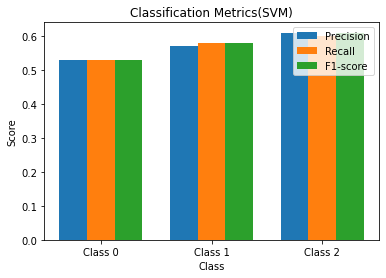

In [128]:
import matplotlib.pyplot as plt
import numpy as np

# Define the class labels
class_labels = ['Class 0', 'Class 1', 'Class 2']

# Define the precision, recall, and F1-score for each class
precision = [0.53, 0.57, 0.61]
recall = [0.53, 0.58, 0.60]
f1_score = [0.53, 0.58, 0.61]

# Define the x-axis locations for the bars
x_ticks = np.arange(len(class_labels))

# Set the bar width
bar_width = 0.25

# Plot the precision, recall, and F1-score for each class as separate bars
fig, ax = plt.subplots()
ax.bar(x_ticks - bar_width, precision, bar_width, label='Precision')
ax.bar(x_ticks, recall, bar_width, label='Recall')
ax.bar(x_ticks + bar_width, f1_score, bar_width, label='F1-score')

# Add labels, title, and legend
ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Classification Metrics(SVM)')
ax.set_xticks(x_ticks)
ax.set_xticklabels(class_labels)
ax.legend()

# Show the plot
plt.show()

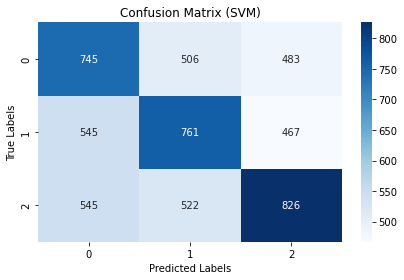

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming conf_matrix is a 2D array or a DataFrame
# You can pass conf_matrix to seaborn’s heatmap function

# Create a figure and axis
Fig, ax = plt.subplots()

# Plot the heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', ax=ax)

# Add labels and title
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix (SVM)')

# Show the plot
plt.tight_layout()
plt.show()


### LOGISTIC REGRESSION

In [130]:
def LR_classifier(train_vecs, Y_train, test_vecs, Y_test):
    # Training
    LR = LogisticRegression()
    LR.fit(train_vecs, Y_train)

    # testing
    test_predictionLR = LR.predict(test_vecs)
    return classification_report(test_predictionLR, Y_test) , confusion_matrix(test_predictionLR, Y_test)

In [131]:
LR = LogisticRegression()
LR.fit(train_vecs, Y_train)

print("ACCUARACY ON TRAINING DATA",LR.score(train_vecs,Y_train))

ACCUARACY ON TRAINING DATA 0.7526190476190476


In [132]:
import re
import numpy as np
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

def preprocess_text(text):
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text)
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    words = " ".join(word for word in text.split() if word not in STOP_WORDS)
    return words

def predict_sentiment(sentence, vectorizer, model):
    # preprocess the sentence
    preprocessed_sentence = preprocess_text(sentence)

    # transform the preprocessed sentence into a feature vector
    sentence_vec = vectorizer.transform([preprocessed_sentence]).reshape(1, -1)

    # predict the sentiment label using the trained model
    predicted_label = model.predict(sentence_vec)

    return predicted_label[0]



# preprocess the training data
train_data = [preprocess_text(text) for text in X_train]

# initialize the TfidfVectorizer object with the same parameters used during training
tfidf = TfidfVectorizer(max_features=5000)

# fit the vectorizer on the training data
tfidf.fit(train_data)

# transform the training data into feature vectors
train_vecs = tfidf.transform(train_data)

# load the trained model

model = LogisticRegression()
model.fit(train_vecs, Y_train)

# test the model on a new sentence
sentence = "جس قسم گندے الفاظ فضلو نے دھرنے کی خواتین کے بارے میں استعمال کئے اس پر تمام سیاسی اور مذہبی جماعتوں کو انکا بائکاٹ کرنا چاہئے"
predicted_sentiment = predict_sentiment(sentence, tfidf, model)
# print("Predicted sentiment:", predicted_sentiment)
print(" *********** LOGISTIC ***********")
print(sentence)
print("Predicted label: ", encoded_sentiments[1][predicted_sentiment])


 *********** LOGISTIC ***********
جس قسم گندے الفاظ فضلو نے دھرنے کی خواتین کے بارے میں استعمال کئے اس پر تمام سیاسی اور مذہبی جماعتوں کو انکا بائکاٹ کرنا چاہئے
Predicted label:  NEGATIVE


In [133]:
class_report , conf_matrix = LR_classifier(train_vecs, Y_train, test_vecs, Y_test)
print('Results of Logistic Regression Classifier on TF-IDF Vectorizer\n')
print(class_report)
print(conf_matrix)

Results of Logistic Regression Classifier on TF-IDF Vectorizer

              precision    recall  f1-score   support

           0       0.45      0.46      0.45      1807
           1       0.45      0.46      0.45      1758
           2       0.48      0.46      0.47      1835

    accuracy                           0.46      5400
   macro avg       0.46      0.46      0.46      5400
weighted avg       0.46      0.46      0.46      5400

[[828 489 490]
 [521 800 437]
 [486 500 849]]


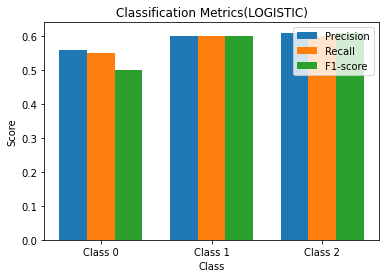

In [134]:
import matplotlib.pyplot as plt
import numpy as np

# Define the class labels
class_labels = ['Class 0', 'Class 1', 'Class 2']

# Define the precision, recall, and F1-score for each class
precision = [0.56, 0.60, 0.61]
recall = [0.55, 0.60, 0.60]
f1_score = [0.5, 0.60, 0.61]

# Define the x-axis locations for the bars
x_ticks = np.arange(len(class_labels))

# Set the bar width
bar_width = 0.25

# Plot the precision, recall, and F1-score for each class as separate bars
fig, ax = plt.subplots()
ax.bar(x_ticks - bar_width, precision, bar_width, label='Precision')
ax.bar(x_ticks, recall, bar_width, label='Recall')
ax.bar(x_ticks + bar_width, f1_score, bar_width, label='F1-score')

# Add labels, title, and legend
ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Classification Metrics(LOGISTIC)')
ax.set_xticks(x_ticks)
ax.set_xticklabels(class_labels)
ax.legend()

# Show the plot
plt.show()

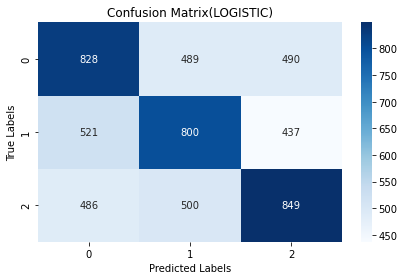

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming conf_matrix is a 2D array or a DataFrame
# You can pass conf_matrix to seaborn’s heatmap function

# Create a figure and axis
Fig, ax = plt.subplots()

# Plot the heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', ax=ax)

# Add labels and title
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix(LOGISTIC)')

# Show the plot
plt.tight_layout()
plt.show()


# DEEP LEARNING ALGORITHM


##### RNN(RECURRENT NEURAL NETWORK)

In [136]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(df.lemmatized_text)
print(tokenizer)
# The fit_on_texts() method creates an association between the words and the assigned numbers. This association is stored in the form of a dictionary in the tokenizer.word_index attribute.
vocab_size = len(tokenizer.word_index) + 1    

# Now, replace the words with their assigned numbers using the text_to_sequence() method.

encoded_docs = tokenizer.texts_to_sequences(df.lemmatized_text)
print(encoded_docs)
print(vocab_size)

[[1381, 991, 765], [3759], [1069], [1207, 4303, 3355], [4304, 765, 660, 3027, 765, 765, 3356], [4305, 59], [16, 37, 582, 1616, 3357, 1259, 276], [3760, 315, 160, 120, 56, 2493, 1208, 992, 2493, 44, 583, 315, 1260, 120, 44], [289, 135, 39, 39, 2288, 300, 446, 867, 4306], [55, 2289, 494, 411, 1315, 2713, 4307, 1070, 169, 1117], [2288, 567, 1030, 3761, 517], [3028, 1071, 661, 302], [12, 25, 4308, 370, 277, 29], [3358, 2494, 3359, 3762, 169, 532, 3358], [2714, 296, 116, 619, 662, 644], [950, 2290, 4309, 868, 2291, 191, 211, 2142, 325, 42], [192, 3029, 241, 1031, 584, 663, 3029, 57], [3030, 3763, 4310, 2495, 1209, 4311, 3360, 15, 290, 3361], [1118, 1165, 486, 766, 1316, 169], [1841, 63, 869, 19, 925], [39, 129, 419, 765, 1732, 2496, 169, 1733, 107, 1443], [2496, 993, 2143, 2144, 21, 2145, 4312], [2497, 1975, 4313, 2497], [4314, 15, 1444, 150, 109, 3362, 301, 4314, 15, 301], [272, 4315, 2715, 2716, 236], [68, 4316, 994, 215, 792, 1032, 518, 951, 766, 4317], [1976, 120, 2292, 567, 568, 793], 

In [137]:
# Each of the sentences in the dataset is not of equal length. Use padding to pad the sentences to have equal length.

from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(encoded_docs, maxlen=200)
print(padded_sequence)

[[   0    0    0 ... 1381  991  765]
 [   0    0    0 ...    0    0 3759]
 [   0    0    0 ...    0    0 1069]
 ...
 [   0    0    0 ...   17 2560  649]
 [   0    0    0 ...   16 1348  423]
 [   0    0    0 ...  724 1988   50]]


In [138]:
from tensorflow.keras.models import Sequential # INITIALIZE NEURAL NETWORK
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D # DENSE ADD INPUT OUTPUT AND HIDDEN LAYER
from tensorflow.keras.layers import Embedding
# Define the vocabulary size and the length of the embedding vector
vocab_size = 13234
embedding_vector_length = 32
# Initialize the model
model = Sequential()
# Add the embedding layer
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
# Add the spatial dropout layer
model.add(SpatialDropout1D(0.25))
# Add the LSTM layer
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
# Add the dropout layer
model.add(Dropout(0.2))
# Add the output layer
model.add(Dense(1, activation='sigmoid'))
# Compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

# Print the summary of the model
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           423488    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 440,139
Trainable params: 440,139
Non-trainable params: 0
__________________________________________________

In [139]:
# Train the sentiment analysis model for 5 epochs on the whole dataset with a batch size of 32 and a validation split of 20%.

history = model.fit(padded_sequence,encoded_sentiments[0],validation_split=0.2, epochs=10, batch_size=32)
# The python sentiment analysis model obtained 98% accuracy on the training set and 63% accuracy on the test set

Epoch 1/10
450/450 [==============================] - 42s 87ms/step - loss: 0.0000e+00 - accuracy: 0.3653 - val_loss: 0.0000e+00 - val_accuracy: 0.2061
Epoch 2/10
450/450 [==============================] - 39s 88ms/step - loss: 0.0000e+00 - accuracy: 0.3817 - val_loss: 0.0000e+00 - val_accuracy: 0.2706
Epoch 3/10
450/450 [==============================] - 38s 85ms/step - loss: 0.0000e+00 - accuracy: 0.3977 - val_loss: 0.0000e+00 - val_accuracy: 0.2556
Epoch 4/10
450/450 [==============================] - 42s 93ms/step - loss: 0.0000e+00 - accuracy: 0.4015 - val_loss: 0.0000e+00 - val_accuracy: 0.2706
Epoch 5/10
450/450 [==============================] - 39s 87ms/step - loss: 0.0000e+00 - accuracy: 0.4094 - val_loss: 0.0000e+00 - val_accuracy: 0.2742
Epoch 6/10
450/450 [==============================] - 41s 90ms/step - loss: 0.0000e+00 - accuracy: 0.4107 - val_loss: 0.0000e+00 - val_accuracy: 0.2708
Epoch 7/10
450/450 [==============================] - 37s 82ms/step - loss: 0.0000e+00 -

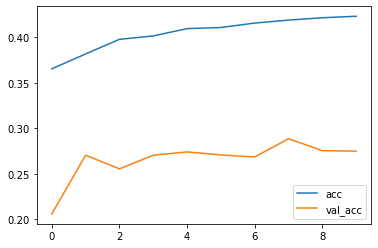

<Figure size 432x288 with 0 Axes>

In [140]:
# Let’s plot these metrics using the matplotlib.

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

plt.savefig("Accuracy plot.jpg")

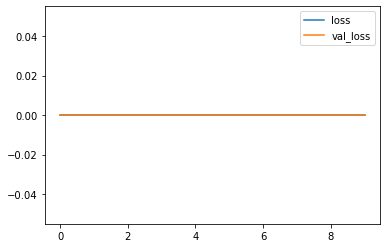

<Figure size 432x288 with 0 Axes>

In [141]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

plt.savefig("Loss plt.jpg")

##### Let’s execute sentiment analysis model

In [142]:
# Define a function that takes a text as input and outputs its prediction label.

def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    
    global prediction
    prediction = int(model.predict(tw).round().item())
 
    print("Predicted label: ", encoded_sentiments[1][prediction])
    

print(" ********** RNN *********")
test_sentence1 = "جس قسم گندے الفاظ فضلو نے دھرنے کی خواتین کے بارے میں استعمال کئے اس پر تمام سیاسی اور مزھبی جماعتوں کو انکا بائکاٹ کرنا چاہئے "
print(test_sentence1)
predict_sentiment(test_sentence1)



 ********** RNN *********
جس قسم گندے الفاظ فضلو نے دھرنے کی خواتین کے بارے میں استعمال کئے اس پر تمام سیاسی اور مزھبی جماعتوں کو انکا بائکاٹ کرنا چاہئے 
1/1 [==============================] - 0s 306ms/step
Predicted label:  NEUTRAL


In [143]:
from sklearn.metrics import confusion_matrix, classification_report

# create lists to store predicted and true labels
predicted_labels = []
true_labels = []

# loop through each sentence in the test set and predict the sentiment
for sentence, label in zip(X_test, Y_test):
    predict_sentiment(sentence)
    predicted_labels.append(prediction)
    true_labels.append(label)

# create the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(confusion_mat)

# create the classification report
class_report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(class_report)

1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 19ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 20ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 26ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 24ms/step
Predicted

1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 22ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 22ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 25ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 22ms/step
Predict

Predicted label:  POSITIVE
1/1 [==============================] - 0s 20ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 20ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 19ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 22ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 25ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [===========================

1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 20ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predi

1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 22ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 22ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 21ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 21ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predic

1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicte

1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 20ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 20ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 21ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 25ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 20ms/step
Predicte

1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 22ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 22ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted

1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 19ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 24ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 21ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 24ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 19ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 22ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 22ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 24ms/step
Pred

1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 22ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 24ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 20ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 22ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 22ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 21ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 25ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 21ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 25ms/step
Predi

1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 25ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 22ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 25ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 19ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 24ms/step
Predict

Predicted label:  NEUTRAL
1/1 [==============================] - 0s 25ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 21ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 24ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 24ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 25ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 25ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 21ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 20ms/step
Predicted label:  POSITIVE
1/1 [==========================

1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 22ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 21ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predict

1/1 [==============================] - 0s 24ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 19ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted

1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 20ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 22ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicte

1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 22ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 20ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 19ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 21ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 22ms/step
Predict

1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 22ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 19ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 22ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 24ms/step
Predicted

1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 24ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 20ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicte

1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 25ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 28ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 22ms/step
Predicte

1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 25ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 22ms/step
Predicte

1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 20ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 22ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 22ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 25ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 25ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 25ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 20ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 22ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 24ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predic

1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 22ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 25ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 20ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predic

1/1 [==============================] - 0s 22ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 22ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 24ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 22ms/step
Predict

1/1 [==============================] - 0s 21ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 22ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 21ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 21ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 22ms/step
Predicted

1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 20ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 22ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicte

1/1 [==============================] - 0s 20ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 22ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 23ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 24ms/step
Predicted

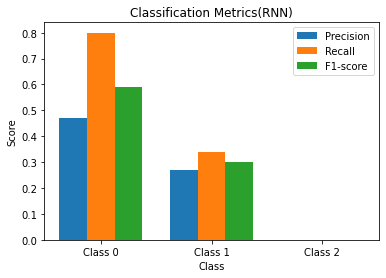

In [144]:
import matplotlib.pyplot as plt
import numpy as np

# Define the class labels
class_labels = ['Class 0', 'Class 1', 'Class 2']

# Define the precision, recall, and F1-score for each class
precision = [0.47, 0.27, 0.00]
recall = [0.80, 0.34, 0.00]
f1_score = [0.59, 0.30, 0.00]

# Define the x-axis locations for the bars
x_ticks = np.arange(len(class_labels))

# Set the bar width
bar_width = 0.25

# Plot the precision, recall, and F1-score for each class as separate bars
fig, ax = plt.subplots()
ax.bar(x_ticks - bar_width, precision, bar_width, label='Precision')
ax.bar(x_ticks, recall, bar_width, label='Recall')
ax.bar(x_ticks + bar_width, f1_score, bar_width, label='F1-score')

# Add labels, title, and legend
ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Classification Metrics(RNN)')
ax.set_xticks(x_ticks)
ax.set_xticklabels(class_labels)
ax.legend()

# Show the plot
plt.show()

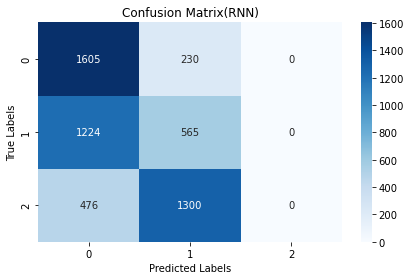

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming conf_matrix is a 2D array or a DataFrame
# You can pass conf_matrix to seaborn’s heatmap function

# Create a figure and axis
Fig, ax = plt.subplots()

# Plot the heatmap
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap='Blues', ax=ax)

# Add labels and title
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix(RNN)')

# Show the plot
plt.tight_layout()
plt.show()


##### LSTM(LONG SHORT TERM MEMORY)

In [146]:
# We will then create our tokenizer and convert our text data into sequences:
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
df['lemmatized_text']=df['lemmatized_text'].astype(str)
tokenizer.fit_on_texts(df['lemmatized_text'].values)
X = tokenizer.texts_to_sequences(df['lemmatized_text'].values)
X = pad_sequences(X)
X.shape


(18000, 24)

In [147]:
# We can then create our LSTM model:
max_features = 2000
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         256000    
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 387,971
Trainable params: 387,971
Non-trainable params: 0
_________________________________________________________________
None


In [148]:
from keras.utils import np_utils
Y = np_utils.to_categorical(df['encoded_sentiments'].values, 3)
Y.shape
model.fit(X, Y, batch_size=32, epochs=10, validation_split=0.3)

Epoch 1/10
394/394 [==============================] - 16s 33ms/step - loss: 0.9469 - accuracy: 0.5380 - val_loss: 1.0633 - val_accuracy: 0.5374
Epoch 2/10
394/394 [==============================] - 13s 33ms/step - loss: 0.7975 - accuracy: 0.6396 - val_loss: 1.1245 - val_accuracy: 0.5320
Epoch 3/10
394/394 [==============================] - 13s 32ms/step - loss: 0.7522 - accuracy: 0.6634 - val_loss: 1.1524 - val_accuracy: 0.5241
Epoch 4/10
394/394 [==============================] - 14s 36ms/step - loss: 0.7190 - accuracy: 0.6779 - val_loss: 1.1927 - val_accuracy: 0.5181
Epoch 5/10
394/394 [==============================] - 13s 34ms/step - loss: 0.6806 - accuracy: 0.6990 - val_loss: 1.2426 - val_accuracy: 0.5148
Epoch 6/10
394/394 [==============================] - 13s 33ms/step - loss: 0.6397 - accuracy: 0.7166 - val_loss: 1.3811 - val_accuracy: 0.5026
Epoch 7/10
394/394 [==============================] - 13s 34ms/step - loss: 0.6021 - accuracy: 0.7313 - val_loss: 1.4661 - val_accuracy:

In [149]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw, maxlen=200)
    
    global prediction
    prediction = model.predict(tw)
    predicted_label = np.argmax(prediction)
 
    print("Predicted label: ", encoded_sentiments[1][predicted_label])
print(" ******** LSTM *********")    
test_sentence1 = "جس قسم گندے الفاظ فضلو نے دھرنے کی خواتین کے بارے میں استعمال کئے اس پر تمام سیاسی اور مزھبی جماعتوں کو انکا بائکاٹ کرنا چاہئے "
test_sentence2 = "ﻧﻮﺭ ﺑﻐﺪﺍﺩ ﮐﯽ ﮔﻠﯿﻮﮞ ﮐﺎ ﮨﮯ ﮨﺮ ﺍﯾﮏ ﮐﺮﻥ ﺍﺱ ﮐﯽ ﻣﺪﯾﻨﮧ ﺳﮯ ﭼﻠﯽ ﮨﮯ " 
test_sentence3 = "دل دہلا دینے والا واقعہ، 75 فٹ‌ لمبا سوئمنگ پول اچانک زمیں بوس، ویڈیو سامنے آگئی "
test_sentence4 = " ایم کیو ایم منی لانڈرنگ کیس، وفاقی وزیر فروغ نسیم اور خالد مقبول صدیقی ایف آئی   "
test_sentence5 = "امریکا سے آکر خاتون نے سندھ کے اسپتال سے آپریشن کروالیا "
test_sentence6 = "غصے پر کیسے قابو پایا جائے؟"
print(test_sentence1)
sen1 = predict_sentiment(test_sentence1)
print(test_sentence2)
sen2 = predict_sentiment(test_sentence2)
print(test_sentence3)
sen3 = predict_sentiment(test_sentence3)
print(test_sentence4)
sen4 = predict_sentiment(test_sentence4)
print(test_sentence5)
sen5 = predict_sentiment(test_sentence5)
print(test_sentence6)
sen6 = predict_sentiment(test_sentence6)



 ******** LSTM *********
جس قسم گندے الفاظ فضلو نے دھرنے کی خواتین کے بارے میں استعمال کئے اس پر تمام سیاسی اور مزھبی جماعتوں کو انکا بائکاٹ کرنا چاہئے 
1/1 [==============================] - 0s 292ms/step
Predicted label:  NEUTRAL
ﻧﻮﺭ ﺑﻐﺪﺍﺩ ﮐﯽ ﮔﻠﯿﻮﮞ ﮐﺎ ﮨﮯ ﮨﺮ ﺍﯾﮏ ﮐﺮﻥ ﺍﺱ ﮐﯽ ﻣﺪﯾﻨﮧ ﺳﮯ ﭼﻠﯽ ﮨﮯ 
1/1 [==============================] - 0s 28ms/step
Predicted label:  POSITIVE
دل دہلا دینے والا واقعہ، 75 فٹ‌ لمبا سوئمنگ پول اچانک زمیں بوس، ویڈیو سامنے آگئی 
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEGATIVE
 ایم کیو ایم منی لانڈرنگ کیس، وفاقی وزیر فروغ نسیم اور خالد مقبول صدیقی ایف آئی   
1/1 [==============================] - 0s 29ms/step
Predicted label:  NEUTRAL
امریکا سے آکر خاتون نے سندھ کے اسپتال سے آپریشن کروالیا 
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEGATIVE
غصے پر کیسے قابو پایا جائے؟
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEUTRAL


In [150]:
from sklearn.metrics import confusion_matrix, classification_report

# create lists to store predicted and true labels
predicted_labels = []
true_labels = []

# loop through each sentence in the test set and predict the sentiment
for sentence, label in zip(X_test, Y_test):
    predict_sentiment(sentence)
    predicted_label = np.argmax(prediction) # modify to get the predicted label using np.argmax
    predicted_labels.append(predicted_label)
    true_labels.append(np.argmax(label)) # modify to get the true label using np.argmax

# create the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(confusion_mat)

# create the classification report
class_report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(class_report)

1/1 [==============================] - 0s 29ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 30ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 29ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 28ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 29ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 31ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 29ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 31ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 38ms/step
Pre

1/1 [==============================] - 0s 30ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 29ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 30ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 30ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 33ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 29ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 29ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 30ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 29ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 29ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 30ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 30ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 30ms/step
Pred

1/1 [==============================] - 0s 27ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 31ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Pre

1/1 [==============================] - 0s 26ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 26ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 26ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 26ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 26ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 27ms/step
Pre

1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 26ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 26ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 26ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 26ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 26ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 26ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 29ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 27ms/step
Predi

1/1 [==============================] - 0s 29ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 28ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 29ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 29ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 28ms/step
Predict

1/1 [==============================] - 0s 28ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 28ms/step
Pred

1/1 [==============================] - 0s 27ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 26ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 26ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 26ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 26ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 26ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predict

1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 26ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 26ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 26ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 26ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Pre

1/1 [==============================] - 0s 29ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 34ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 31ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 29ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 28ms/step
Pred

1/1 [==============================] - 0s 30ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 30ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 32ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 29ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 30ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 30ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 28ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 28ms/step
Pre

1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 26ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predi

1/1 [==============================] - 0s 30ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 29ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 26ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 30ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 26ms/step
Predi

1/1 [==============================] - 0s 28ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 29ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 28ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 29ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predic

1/1 [==============================] - 0s 28ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 28ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 28ms/step
Predicte

1/1 [==============================] - 0s 26ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 30ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 29ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 27ms/step
Predic

1/1 [==============================] - 0s 27ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 28ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 29ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 29ms/step
Predict

1/1 [==============================] - 0s 28ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 30ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 29ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 32ms/step
Pred

1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 29ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 28ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 29ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 28ms/step
Pred

1/1 [==============================] - 0s 30ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 31ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 31ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 32ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 31ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 30ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 29ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 30ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 31ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 30ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 29ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 30ms/step
Pre

1/1 [==============================] - 0s 27ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 29ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predi

1/1 [==============================] - 0s 32ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 30ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 31ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 26ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predic

1/1 [==============================] - 0s 28ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 29ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Pre

1/1 [==============================] - 0s 29ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 29ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 28ms/step
Predic

1/1 [==============================] - 0s 32ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 29ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predi

1/1 [==============================] - 0s 26ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 28ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 27ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 27ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 27ms/step
Pred

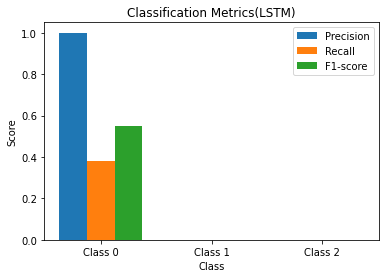

In [151]:
import matplotlib.pyplot as plt
import numpy as np

# Define the class labels
class_labels = ['Class 0', 'Class 1', 'Class 2']

# Define the precision, recall, and F1-score for each class
precision = [1.00, 0.0, 0.00]
recall = [0.38, 0.00, 0.00]
f1_score = [0.55, 0.00, 0.00]

# Define the x-axis locations for the bars
x_ticks = np.arange(len(class_labels))

# Set the bar width
bar_width = 0.25

# Plot the precision, recall, and F1-score for each class as separate bars
fig, ax = plt.subplots()
ax.bar(x_ticks - bar_width, precision, bar_width, label='Precision')
ax.bar(x_ticks, recall, bar_width, label='Recall')
ax.bar(x_ticks + bar_width, f1_score, bar_width, label='F1-score')

# Add labels, title, and legend
ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Classification Metrics(LSTM)')
ax.set_xticks(x_ticks)
ax.set_xticklabels(class_labels)
ax.legend()

# Show the plot
plt.show()

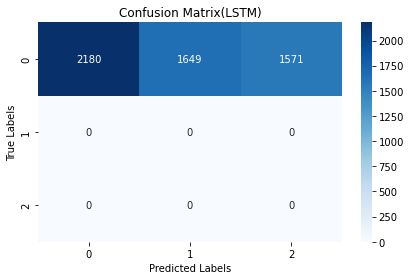

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming conf_matrix is a 2D array or a DataFrame
# You can pass conf_matrix to seaborn’s heatmap function

# Create a figure and axis
Fig, ax = plt.subplots()

# Plot the heatmap
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap='Blues', ax=ax)

# Add labels and title
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix(LSTM)')

# Show the plot
plt.tight_layout()
plt.show()


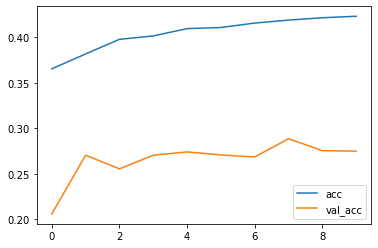

<Figure size 432x288 with 0 Axes>

In [153]:
# Let’s plot these metrics using the matplotlib.

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

plt.savefig("Accuracy plot.jpg")

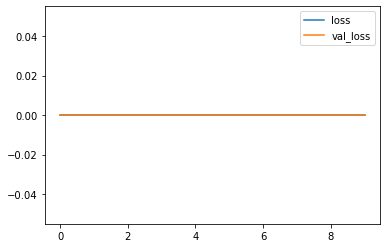

<Figure size 432x288 with 0 Axes>

In [154]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

plt.savefig("Loss plt.jpg")

# TRANSFORMER

In [155]:
# pip install transformers

In [156]:
# import pandas as pd
# import torch
# import transformers
# from sklearn.model_selection import train_test_split
# from torch.utils.data import DataLoader, Dataset

# # Load the pre-trained transformer model
# model_name = "bert-base-multilingual-cased"
# tokenizer = transformers.BertTokenizer.from_pretrained(model_name)
# model = transformers.BertForSequenceClassification.from_pretrained(model_name, num_labels=3)

# # Add attention mechanism
# class Attention(torch.nn.Module):
#     def __init__(self, hidden_dim):
#         super(Attention, self).__init__()
#         self.hidden_dim = hidden_dim
#         self.attn = torch.nn.Linear(hidden_dim * 2, hidden_dim)
#         self.v = torch.nn.Linear(hidden_dim, 1, bias=False)

#     def forward(self, hidden_states, attention_mask):
#         # hidden_states shape: (batch_size, seq_length, hidden_dim)
#         # attention_mask shape: (batch_size, seq_length)
#         seq_length = hidden_states.size(1)
#         h = hidden_states.unsqueeze(2).expand(-1, -1, seq_length, -1)  # shape: (batch_size, seq_length, seq_length, hidden_dim)
#         h_t = hidden_states.unsqueeze(1).expand(-1, seq_length, -1, -1)  # shape: (batch_size, seq_length, seq_length, hidden_dim)
#         concatenated = torch.cat([h, h_t], dim=-1)  # shape: (batch_size, seq_length, seq_length, hidden_dim * 2)
#         concatenated = concatenated.view(-1, seq_length, seq_length, self.hidden_dim * 2)
#         energy = torch.tanh(self.attn(concatenated))  # shape: (batch_size, seq_length, seq_length, hidden_dim)
#         energy = energy.view(-1, seq_length, seq_length, self.hidden_dim)
#         v = self.v(energy).squeeze(-1)  # shape: (batch_size, seq_length, seq_length)
#         v = v.masked_fill(attention_mask.unsqueeze(1) == 0, -1e9)
#         attn_weights = torch.softmax(v, dim=-1)  # shape: (batch_size, seq_length, seq_length)
#         context_vector = torch.einsum("bsj,bsj->bs", attn_weights, hidden_states)  # shape: (batch_size, hidden_dim)
#         return context_vector, attn_weights

# # Define dataset class for Urdu news
# class UrduNewsDataset(Dataset):
#     def __init__(self, data, max_len):
#         self.data = data
#         self.max_len = max_len

#     def __len__(self):
#         return len(self.data)

#     def __getitem__(self, index):
#         text = str(self.data.iloc[index]["NEWS"])
#         label = int(self.data.iloc[index]["LABELS"])
#         inputs = tokenizer.encode_plus(
#             text,
#             None,
#             add_special_tokens=True,
#             max_length=self.max_len,
#             padding="max_length",
#             truncation=True,
#             return_attention_mask=True,
#             return_tensors="pt",
#         )
#         return {
#             "input_ids": inputs["input_ids"].squeeze(),
#             "attention_mask": inputs["attention_mask"].squeeze(),
#             "labels": torch.tensor(label, dtype=torch.long),
#         }
    
# # Load and preprocess the data
# data = pd.read_csv("3sentiments1.csv")
# train_data, test_data = train_test_split(data, test_size=0.2)
# train_dataset = UrduNewsDataset(train_data, max_len=128)
# test_dataset = UrduNewsDataset(test_data, max_len=128)
# train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


In [157]:
# # # Train the model
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)
# optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)
# loss_fn = torch.nn.CrossEntropyLoss()
# num_epochs = 5
# for epoch in range(num_epochs):
#     train_loss = 0.0
#     train_correct = 0
#     model.train()
#     for batch in train_loader:
#         input_ids = batch["input_ids"].to(device)
#         attention_mask = batch["attention_mask"].to(device)
#         labels = batch["labels"].to(device)
#         optimizer.zero_grad()
#         outputs = model(input_ids, attention_mask=attention_mask)
#         logits = outputs.logits
#         _, predictions = torch.max(logits, dim=1)
#         loss = loss_fn(logits, labels)
#         loss.backward()
#         optimizer.step()
#         train_loss += loss.item()
#         train_correct += torch.sum(predictions == labels).item()
#     train_loss /= len(train_loader)
#     train_acc = train_correct / len(train_loader.dataset)
    
#     # Evaluate the model on the test set
#     test_loss = 0.0
#     test_correct = 0
#     model.eval()
#     with torch.no_grad():
#         for batch in test_loader:
#             input_ids = batch["input_ids"].to(device)
#             attention_mask = batch["attention_mask"].to(device)
#             labels = batch["labels"].to(device)
#             outputs = model(input_ids, attention_mask=attention_mask)
#             logits = outputs.logits
#             _, predictions = torch.max(logits, dim=1)
#             loss = loss_fn(logits, labels)
#             test_loss += loss.item()
#             test_correct += torch.sum(predictions == labels).item()
#         test_loss /= len(test_loader)
#         test_acc = test_correct / len(test_loader.dataset)
    
#     print(f"Epoch {epoch+1} - Train Loss: {train_loss:.4f} - Train Acc: {train_acc:.4f} - Test Loss: {test_loss:.4f} - Test Acc: {test_acc:.4f}")